# Project: Investigate a Dataset (Medical Appointments No Shows)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This datasource is from [Kaggle-Medical Appointment No Shows](https://www.kaggle.com/joniarroba/noshowappointments). It collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.


> The data consists of following:
- 110,527 medical appointments
- 14 associated variables (characteristics) as folows:
  - 01 - PatientId: Identification of a patient
  - 02 - AppointmentID: Identification of each appointment
  - 03 - Gender: Male/Female. Female is the greater proportion, woman takes way more care of they health in comparison to man.
  - 04 - ScheduledDay: The day someone called or registered the appointment, this is before appointment of course.
  - 05 - AppointmentDay: The day of the actuall appointment, when they have to visit the doctor.
  - 06 - Age: How old is the patient.
  - 07 - Neighbourhood: The location of the hospital.
  - 08 - Scholarship: 1/0. Indicate whether or not the patient is enrolled in Brasilian welfare program [Bolsa Família](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia).
  - 09 - Hipertension: 1/0
  - 10 - Diabetes: 1/0
  - 11 - Alcoholism: 1/0
  - 12 - Handcap: The number of desabilites a person has.
  - 13 - SMS_received: 1 or more messages sent to the patient.
  - 14 - No-show: Yes/No. It says‘Yes' if the patient did not show up, and‘No’if they showed up to their appointment.
>
> The project aims to discover following questions:
- Will patients tend to show up to their appointment if the awaiting days is shorter?
- Are there patients with more than one appointment? And how is the no-show rate for the patients scheduled most appointments in top 30?
- Will patients who received the SMS message tend to show up to their appointment?
- Will there be any differences on the no-show rate between different gender and age?
- How is the age/gender distribution with different disease?


In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load data and print out a few lines
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#check the shape of dataset
df.shape

(110527, 14)

In [4]:
#check the columns and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
#check if any missing values
df.isnull().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

In [6]:
#check if any duplicates
df.duplicated().sum()

0

### Data Cleaning

> - Rename columns
  - To avoid typing mistake, change all the letters in the column name to lower case.
  - Correct spelling mistakes for columns "hipertension" and "handcap".
  - Change "-" to "_" for column "no-show", and add "_" to column "patientid", "scheduledday" and "appointmentday" to standardize the format.

> - Change data type
  - Change data type to "category" for column "gender".
  - Change data type to "str" for column "patient_id".
  
> - Create new columns
  - For easy calculation of the mean in column "no_show", create new column "no_show_bool" with values "True/False".
  - Create new column "age_group" which classifies the values in column "age" into below groups.
    - 0~9: 0-9 years old
    - 10s: 10-19 years old
    - 20s: 20-29 years old
    - 30s: 30-39 years old
    - 40s: 40-49 years old
    - 50s: 50-59 years old
    - 60s: 60-69 years old
    - 70s~: 70 years old or more
  - Create new column "awaiting_time" to calculate the days how long the paitients wait to see the doctor after scheduled the appoitment.
  - Create new column "awaiting_days" which classifies the values in column "awaiting_time" into below groups.
    - Sameday: 0 day
    - 1Day: 1 day
    - 2Days~1Week: 2-7 days
    - 1Week~2Weeks: 8-14 days
    - 2Weeks~3Weeks: 15-21 days
    - 3Weeks~1Month: 22-31 days
    - 1Month~: 32 days or more
  
> - Remove rows
  - Remove the row which age is less than 0.
  - Remove rows which awaiting_days is less than 0, as schedule day is not supposed to be later than appointment day.


In [7]:
#change column name to lower case
df.columns = map(str.lower, df.columns)

#change column name with mis-spelling and standardize the column name
df.rename(columns={'no-show':'no_show',
                   'patientid':'patient_id',
                   'scheduledday':'scheduled_day',
                   'appointmentday':'appointment_day',
                   'hipertension':'hypertension',
                   'handcap':'handicap'},inplace=True)

#confirm the column name after amendment
df.columns

Index(['patient_id', 'appointmentid', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received',
       'no_show'],
      dtype='object')

In [8]:
#change data type to category of column gender
df['gender']=df['gender'].astype('category')
df['gender'].dtype

CategoricalDtype(categories=['F', 'M'], ordered=False)

In [9]:
#change data type to string of column patient_id
df['patient_id']=df['patient_id'].astype(str).replace('\.0', '', regex=True)
df.head()

,patient_id,appointmentid,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [10]:
#create column for no_show which contain boolean value
df['no_show_bool']=[True if x == 'Yes' else False for x in df['no_show']]
df.head(1)

,patient_id,appointmentid,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,no_show_bool
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,False


In [11]:
#check the age unique value
df.groupby('age')['age'].nunique()

age
-1      1
 0      1
 1      1
 2      1
 3      1
       ..
 98     1
 99     1
 100    1
 102    1
 115    1
Name: age, Length: 104, dtype: int64

In [12]:
#drop the row of age less than 0
df=df[df['age']>=0]
#confirm the -1 value has been removed
df['age'].min()

0

In [13]:
#create new column age_group to categorize the age column
age_labels = ['0~9','10s','20s','30s','40s','50s','60s','70s~']
age_edges = [-1,9,19,29,39,49,59,69,115]
df['age_group'] = pd.cut(df['age'], age_edges, labels=age_labels)
df.head()

,patient_id,appointmentid,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,no_show_bool,age_group
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,False,60s
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,False,50s
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,False,60s
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,False,0~9
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,False,50s


In [14]:
#create new column awaiting_time for the days between appointment_day and scheduled_day
scheduled_date=pd.to_datetime(df['scheduled_day']).dt.date
appointment_date=pd.to_datetime(df['appointment_day']).dt.date
df['awaiting_time']=appointment_date-scheduled_date
df['awaiting_time']= df['awaiting_time'].apply(lambda x: x.days)
df.head()

,patient_id,appointmentid,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,no_show_bool,age_group,awaiting_time
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,False,60s,0
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,False,50s,0
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,False,60s,0
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,False,0~9,0
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,False,50s,0


In [15]:
df.groupby('awaiting_time')['no_show'].nunique()

awaiting_time
-6      1
-1      1
 0      2
 1      2
 2      2
       ..
 155    2
 162    2
 169    2
 176    2
 179    2
Name: no_show, Length: 131, dtype: int64

In [16]:
#drop the rows which awaiting time is less than 0 days as appointment day is not supposed to be earlier than scheduled day
df=df[df['awaiting_time']>=0]
#check if all the rows of awaiting time less than 0 has been dropped
df[df['awaiting_time']<0].any().all()

False

In [17]:
#create new column awaiting_days to categorize the awaiting_time column
time_labels = ['Sameday','1Day','2Days~1Week','1Week~2Weeks','2Weeks~3Weeks','3Weeks~1Month','1Month~']
time_edges = [-1,0,1,7,14,21,31,179]
df['awaiting_days'] = pd.cut(df['awaiting_time'], time_edges, labels=time_labels)
df.head()

,patient_id,appointmentid,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,no_show_bool,age_group,awaiting_time,awaiting_days
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,False,60s,0,Sameday
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,False,50s,0,Sameday
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,False,60s,0,Sameday
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,False,0~9,0,Sameday
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,False,50s,0,Sameday


In [18]:
#check the columns and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   patient_id       110521 non-null  object  
 1   appointmentid    110521 non-null  int64   
 2   gender           110521 non-null  category
 3   scheduled_day    110521 non-null  object  
 4   appointment_day  110521 non-null  object  
 5   age              110521 non-null  int64   
 6   neighbourhood    110521 non-null  object  
 7   scholarship      110521 non-null  int64   
 8   hypertension     110521 non-null  int64   
 9   diabetes         110521 non-null  int64   
 10  alcoholism       110521 non-null  int64   
 11  handicap         110521 non-null  int64   
 12  sms_received     110521 non-null  int64   
 13  no_show          110521 non-null  object  
 14  no_show_bool     110521 non-null  bool    
 15  age_group        110521 non-null  category
 16  awaiting_time    110

In [19]:
#drop the columns not used in EDA
df.drop(['appointmentid','scheduled_day','appointment_day','neighbourhood','handicap','scholarship','no_show'],axis=1,inplace=True)

In [20]:
#print out the data shape
df.shape

(110521, 11)

In [21]:
#print out the data after cleaning
df.head()

,patient_id,gender,age,hypertension,diabetes,alcoholism,sms_received,no_show_bool,age_group,awaiting_time,awaiting_days
0,29872499824296,F,62,1,0,0,0,False,60s,0,Sameday
1,558997776694438,M,56,0,0,0,0,False,50s,0,Sameday
2,4262962299951,F,62,0,0,0,0,False,60s,0,Sameday
3,867951213174,F,8,0,0,0,0,False,0~9,0,Sameday
4,8841186448183,F,56,1,1,0,0,False,50s,0,Sameday


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Will patients tend to show up to their appointment if the awaiting days is shorter?

In [22]:
#statistics of awaiting time
df[['awaiting_time']].describe()

,awaiting_time
count,110521.000000
mean,10.184345
std,15.255153
min,0.000000
25%,0.000000
50%,4.000000
75%,15.000000
max,179.000000


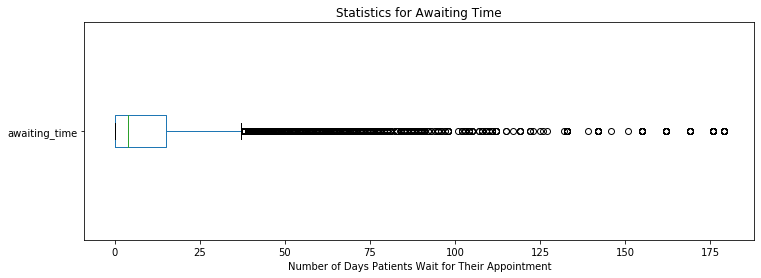

In [23]:
#box plot for awaiting time
df[['awaiting_time']].plot(kind='box',figsize=(12,4),vert=False);
plt.title('Statistics for Awaiting Time');
plt.xlabel('Number of Days Patients Wait for Their Appointment');

**Findings:**

>- The median for the awaiting days of patients is 4 days, and the awaiting days of 75% of the patients are within 15 days(around 2 weeks).
>- There are many outliers for the awaiting days, and the longest is up to 179 days.

In [24]:
#show/no-show counts group by awaiting days
df_q1=df.groupby('awaiting_days')['no_show_bool'].value_counts().unstack()
df_q1

no_show_bool,False,True
awaiting_days,,
Sameday,36770,1792
1Day,4100,1113
2Days~1Week,20313,6659
1Week~2Weeks,8361,3664
2Weeks~3Weeks,6013,2861
3Weeks~1Month,6149,3020
1Month~,6501,3205


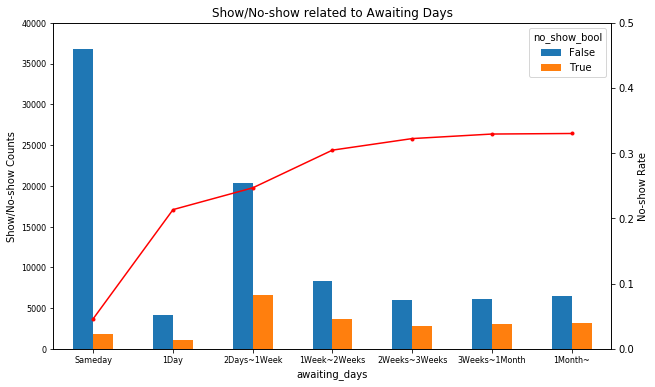

In [25]:
# plot show/no-show counts group by awaiting days
df_q1.plot(kind='bar',figsize=(10,6),fontsize=8);
plt.ylim([0,40000]);
plt.ylabel('Show/No-show Counts');

# plot no-show rate group by awaiting days
df.groupby('awaiting_days').no_show_bool.mean().plot(secondary_y=True,marker='.',color='r');
plt.ylim([0,0.5]);
plt.title('Show/No-show related to Awaiting Days');
plt.ylabel('No-show Rate');

**Findings:**

>- The number of sameday appointment is the highest compared to other range of awaiting days. And there is high probability that patients will show up to their appointment on same day.
>- The average no-show rate for each range of awaiting days is in upward trend. It is likely that patients will not show up if they need to wait longer for their appointment.

### Research Question 2: Are there patients with more than one appointment? And how is the no-show rate for the patients scheduled most appointments in top 30?

In [26]:
#statistics of appointments made by top 30 patients
df['patient_id'].value_counts().iloc[:30].describe()

count    30.000000
mean     47.433333
std      16.695412
min      23.000000
25%      34.250000
50%      44.000000
75%      60.750000
max      88.000000
Name: patient_id, dtype: float64

In [27]:
#no-show rate on average
df['no_show_bool'].mean()

0.2018982817745044

In [28]:
#average no-show rate for the top 30 patients
top30_list=df['patient_id'].value_counts().iloc[:30].index
df[df['patient_id'].isin(top30_list)].no_show_bool.mean()

0.04286718200983837

In [29]:
#Show/No-show Counts by Top 30 Patients
df_q2=df[df['patient_id'].isin(top30_list)].groupby('patient_id')['no_show_bool'].value_counts().unstack().sort_values(False,ascending=False)
df_q2.head()

no_show_bool,False,True
patient_id,,
822145925426128,87.0,1.0
99637671331,80.0,4.0
26886125921145,70.0,NaN
33534783483176,65.0,NaN
258424392677,62.0,NaN


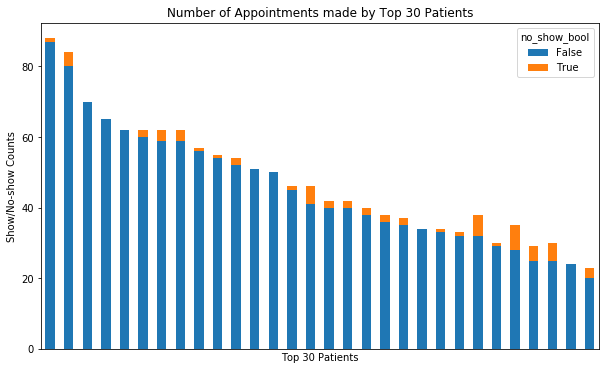

In [30]:
#plot Show/No-show Counts of Top 30 Patients
df_q2.plot(kind='bar',figsize=(10,6),stacked=True)
plt.xticks([]);
plt.title('Number of Appointments made by Top 30 Patients');
plt.xlabel('Top 30 Patients');
plt.ylabel('Show/No-show Counts');

**Findings:**

>- There are patients made multiple appointments.
>- The average number of appointments made by top 30 patients are 47, and the most is 88.
>- The average no-show rate for top 30 patients is 4.92%, which is lower than the average no-show rate 20% in total.
>- The patients made appointments in high frequency will be likely to show up to their appointment.

### Research Question 3: Will patients who received the SMS message tend to show up to their appointment?

In [31]:
#no-show counts group by sms_recieved
df_q3=df.groupby('sms_received')['no_show_bool'].value_counts().unstack()
df_q3

no_show_bool,False,True
sms_received,,
0,62509,12530
1,25698,9784


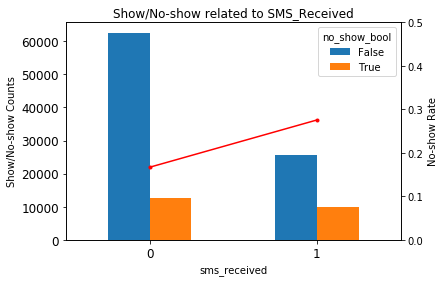

In [32]:
# plot show/no-show counts group by sms_recieved
df_q3.plot(kind='bar',fontsize=12);
plt.ylabel('Show/No-show Counts');

# plot no-show rate group by sms_recieved
df.groupby('sms_received').no_show_bool.mean().plot(secondary_y=True,marker='.',color='r');
plt.ylim([0,0.5]);
plt.title('Show/No-show related to SMS_Received');
plt.ylabel('No-show Rate');

**Findings:**

>- It is about half of patients received SMS message compared to the ones not recieved.
>- It is more likely that patients who received SMS message will not show up compared to the ones not received.

### Research Question 4: Will there be any differences on the no-show rate between different gender and age?

**1. The no-show rate under different age/gender**

In [33]:
#show/no-show counts group by age
df_age_q4=df.groupby('age_group')['no_show_bool'].value_counts().unstack()
df_age_q4

no_show_bool,False,True
age_group,,
0~9,13991,3483
10s,9679,3256
20s,10319,3379
30s,11871,3299
40s,11329,2880
50s,13087,2776
60s,10086,1790
70s~,7845,1451


In [34]:
#no-show counts group by gender
df_gender_q4=df.groupby('gender')['no_show_bool'].value_counts().unstack()
df_gender_q4

no_show_bool,False,True
gender,,
F,57245,14591
M,30962,7723


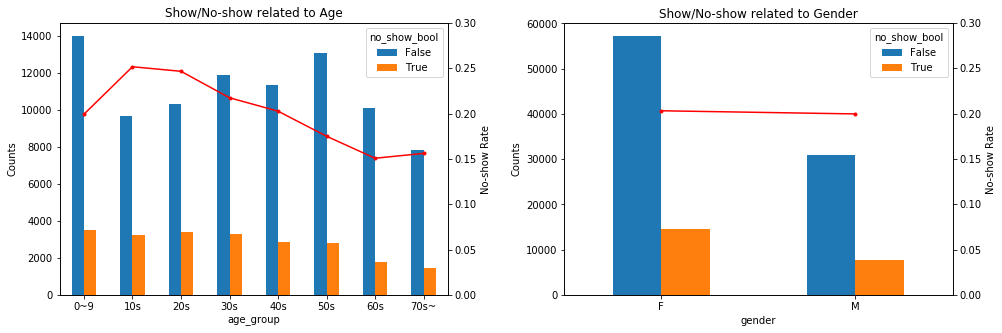

In [35]:
#adjust figure size and space between plots
fig = plt.figure(figsize=(16, 5))
plt.subplots_adjust(wspace=0.3)

#plot bar chart of show/no-show counts related to age
ax1 = fig.add_subplot(1, 2, 1)
df_age_q4.plot(ax=ax1,kind='bar');
plt.ylabel('Counts');
#plot line chart of no-show rate related to age
df.groupby('age_group').no_show_bool.mean().plot(secondary_y=True,marker='.',color='r');
plt.ylim([0,0.3]);
plt.title('Show/No-show related to Age')
plt.ylabel('No-show Rate');

#plot bar chart of show/no-show counts related to gender
ax2 = fig.add_subplot(1, 2, 2)
df_gender_q4.plot(ax=ax2,kind='bar');
plt.ylabel('Counts');
#plot line chart of no-show rate related to gender
df.groupby('gender').no_show_bool.mean().plot(secondary_y=True,marker='.',color='r');
plt.ylim([0,0.3]);
plt.title('Show/No-show related to Gender');
plt.ylabel('No-show Rate');

**Findings:**

>- There is not too much difference on the number of appoinments between different age group. The most is the group under age 0~9, followed by age 50's.
>- The highest no-show rate is under age 10's, and it drops down as the age goes up.
>- The number of appointments by male is about half of female.
>- There is not much difference on the no-show rate between different gender.

**2. The age distribution of patients under different gender**

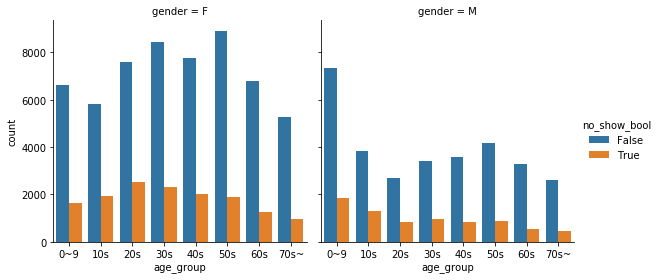

In [36]:
#plot the sho/no-show counts grouped by age with different gender
sns.catplot(x='age_group',hue='no_show_bool', data=df, kind='count',col='gender',height=4);

**Findings:**

>- The number of male patients is less than female patients under all age group except age 0~9.
>- Under same gender, there are more female patients under age 20's-50's, while more male patients are under age 0~9.

**3. No-show rate under different age and gender**

In [37]:
#calculate no-show rate under different age and gender group
df_gender_age_q4 = df.groupby(['gender','age_group'])['no_show_bool'].mean().unstack().T
df_gender_age_q4

gender,F,M
age_group,,
0~9,0.198794,0.199804
10s,0.249325,0.255336
20s,0.249186,0.239563
30s,0.215938,0.221213
40s,0.206914,0.193366
50s,0.175076,0.174832
60s,0.156863,0.137768
70s~,0.156551,0.155150


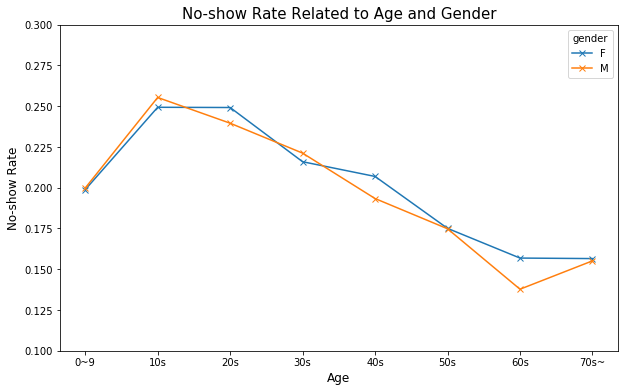

In [38]:
#plot the no-show rate grouped by age with different gender
df_gender_age_q4.plot(marker='x',figsize=(10,6));
plt.xticks(range(len(df_gender_age_q4.index)), df_gender_age_q4.index);
plt.ylim([0.1,0.3])
plt.title('No-show Rate Related to Age and Gender',fontsize=15);
plt.xlabel('Age',fontsize=12);
plt.ylabel('No-show Rate',fontsize=12);

**Findings:**

>- For each age range, there is not much difference of the no-show rate between different gender.
>- The range of no-show rate under male group is larger than female group.
>- For both genders, the no-show rate is higher under age 10's and 20's, and goes down as age increases.

### Research Question 5: How is the age/gender distribution with different disease?

**1. Age distribution of different disease**

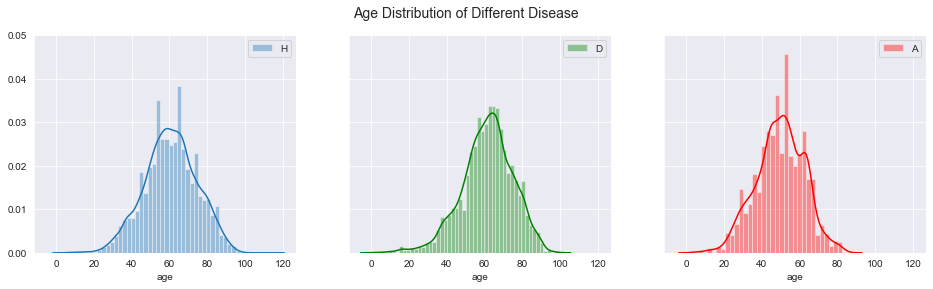

In [39]:
sns.set_style("darkgrid")
#setup the number of subplots, figure size and title
f,(ax1, ax2, ax3)=plt.subplots(1,3,figsize=(16, 4),sharex=True,sharey=True)
f.suptitle('Age Distribution of Different Disease',fontsize=14)
plt.ylim([0,0.05])
#plot the age distribution under different disease
sns.distplot(df.query('hypertension==1')['age'],ax=ax1)
ax1.legend('H')

sns.distplot(df.query('diabetes==1')['age'],color='g',ax=ax2)
ax2.legend('D')

sns.distplot(df.query('alcoholism==1')['age'],color='r',ax=ax3)
ax3.legend('A');

**Findings:**

>- Patients with disease are more likely to be middle-aged (50's-70's).
>- The patients with hypertension or diabetes are more likely to be around 60's, while patients with alcoholism will be younger at around 50's.

**2. Gender proportion of different disease**

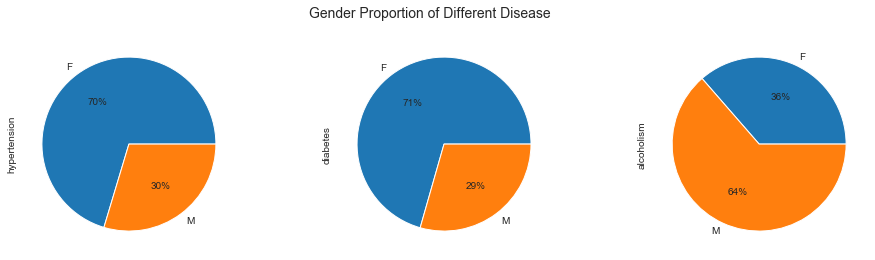

In [40]:
#calculate the sum by different gender
sum_by_gender=df.groupby('gender').sum()

#setup the number of subplots, figure size and title
f, ax=plt.subplots(1, 3, figsize=(16, 4), sharex=True);
f.suptitle('Gender Proportion of Different Disease',fontsize=14);

#plot pie chart for gender proportion of different Diseases
#hypertension
plt.subplot(131)
sum_by_gender.hypertension.plot(kind='pie',autopct='%.0f%%');

#diabetes
plt.subplot(132)
sum_by_gender.diabetes.plot(kind='pie',autopct='%.0f%%');

#alcoholism
plt.subplot(133)
sum_by_gender.alcoholism.plot(kind ='pie',autopct='%.0f%%');

**Findings:**

>- Patients with hypertension or diabetes are more likely to be female, with the proportion more than twice as male patients.
>- Patients with alcoholism are more likely to be male, with the proportion nearly twice as female patients.

<a id='conclusions'></a>
## Conclusions

>- It is more likely that patients will show up to their appointment on same day, and less likely to show up as the awaiting time is getting longer.
>- There are patients made multiple appointments. The patients made appointments in high frequency will be more likely to show up than average.
>- It is more likely that patients who received SMS message will not show up compared to the ones not received.
>- For each gender or in total, the highest no-show rate is under age 10's, and it goes down as age increases.
>- There is not much difference on the no-show rate between different gender.
>- Patients with disease are more likely to be middle-aged (50's-70's), while the peak of patients with alcoholism will be younger at around 50's than patients with hypertension or diabetes which is around 60's.
>- Patients with hypertension or diabetes are more likely to be female, with the proportion more than twice as male. For patients with alcoholism, it is more likely to be male with the proportion nearly twice as female.


In [41]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0